In [6]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import re
import nltk

In [7]:
spam=pd.read_csv('spam.csv')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### Remove useless columns which have more than 90percent values are null

In [9]:
spam = spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA Steps

### 1. Lowering SMS text

In [10]:
 spam['v2'] = spam['v2'].str.lower()

### 2. Remove Punctuation

In [11]:
def removePunctuation(text):
    return "".join([txt for txt in text if txt not in string.punctuation])

In [12]:
spam['Body_punct_clean'] = spam['v2'].apply(lambda x : removePunctuation(x))

In [13]:
spam['Body_punct_clean'].tail(10)

5562    ok lor sony ericsson salesman i ask shuhui the...
5563                                   ard 6 like dat lor
5564    why dont you wait til at least wednesday to se...
5565                                            huh y lei
5566    reminder from o2 to get 250 pounds free call c...
5567    this is the 2nd time we have tried 2 contact u...
5568                  will � b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Body_punct_clean, dtype: object

### 3. Tokennization

In [14]:
def Tokenization(text):
       return re.split('\W+',text)

In [15]:
spam['v1_Tokenized'] = spam['Body_punct_clean'].apply(lambda x : Tokenization(x))

In [16]:
spam['v1_Tokenized'].head(5)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, dont, think, he, goes, to, usf, he, l...
Name: v1_Tokenized, dtype: object

### 4. Remove Stop worrds

In [17]:
def RemoveStopWords(text):
     return [txt for txt in text if txt not in stopword]

In [19]:
stopword = nltk.corpus.stopwords.words('english')

In [20]:
spam['removed_stopword']= spam['v1_Tokenized'].apply(lambda x : RemoveStopWords(x))

In [21]:
spam['removed_stopword'].head(10)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
5    [freemsg, hey, darling, 3, weeks, word, back, ...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, 11, months, u, r, entitled, update, l...
Name: removed_stopword, dtype: object

### 5. Lemitization

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
wml = WordNetLemmatizer()

def lemmatise(lowercase_word):
    lemma = []
    for word in lowercase_word:
        tokens = wml.lemmatize(word)
        lemma.append(tokens)
    return lemma

In [25]:
spam['lemitized_sms'] = spam['removed_stopword'].apply(lambda x : lemmatise(x))

In [26]:
spam['lemitized_sms'].head(10)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, go, usf, life, around, though]
5    [freemsg, hey, darling, 3, week, word, back, i...
6    [even, brother, like, speak, treat, like, aid,...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, 11, month, u, r, entitled, update, la...
Name: lemitized_sms, dtype: object

In [27]:
def apply_styling(df: pd.DataFrame, caption: str = ""):
    
    st = df.style.format({'percent on rent': '{:.0%}'}).hide_index()    
    st.set_table_styles([
           dict(selector="th", props=[('color', 'darkblue'), 
                                      ('vertical-align', 'top')]),
           dict(selector="th:first-child", props=[('max-width', '70px'), ('text-align', 'left')]),
           dict(selector="th:last-child", props=[('max-width', '50px')]),
           dict(selector="td:first-child", props=[('text-align', 'left')])
            ]) 
    st.caption = caption
    return st

In [28]:
apply_styling(spam.head(),'spam-sms')

v1,v2,Body_punct_clean,v1_Tokenized,removed_stopword,lemitized_sms
ham,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']","['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']","['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']"
ham,ok lar... joking wif u oni...,ok lar joking wif u oni,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']"
ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']","['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']","['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']"
ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']","['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']"


##### Considering Body Length as a feature

In [29]:
spam['Body_len'] = spam['v2'].apply(lambda x: len(x) - x.count(" "))

apply_styling(spam.head(), 'Feature-Enginering')


v1,v2,Body_punct_clean,v1_Tokenized,removed_stopword,lemitized_sms,Body_len
ham,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']","['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']","['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']",92
ham,ok lar... joking wif u oni...,ok lar joking wif u oni,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']",24
spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']","['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']",128
ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']","['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']","['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']",39
ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']","['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though']",49


## Visualize the spam and ham length

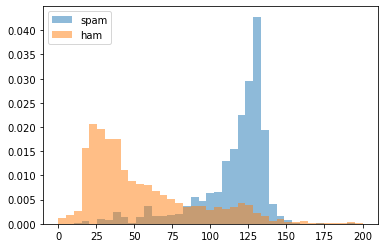

In [33]:
bins = np.linspace(0, 200, 40)
plt.hist(spam[spam['v1'] == "spam"]['Body_len'], bins, alpha= 0.5,density=True, label="spam")
plt.hist(spam[spam['v1'] == "ham"]['Body_len'], bins, alpha= 0.5,density=True, label="ham")
plt.legend(loc="upper left")
plt.show()

##### Observation: Spam msg have higher text length

In [39]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

spam['punct%'] = spam['v2'].apply(lambda x: count_punct(x))

## Now do vectorization and convert text to numbers

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(spam['lemitized_sms'], spam['v1'], test_size=0.2)

In [43]:
y_train

3291     ham
3439     ham
849     spam
794      ham
762     spam
        ... 
429      ham
2393     ham
4914     ham
4010    spam
1458     ham
Name: v1, Length: 4457, dtype: object

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer = TfidfVectorizer()

In [47]:
vectors = vectorizer.fit(X_train.apply(lambda x: ' '.join(x)))
train_tf_idf = vectors.transform(X_train.apply(lambda x: ' '.join(x)))
test_tf_idf = vectors.transform(X_test.apply(lambda x: ' '.join(x)))

In [48]:
train_tf_idf

<4457x7725 sparse matrix of type '<class 'numpy.float64'>'
	with 37455 stored elements in Compressed Sparse Row format>

In [49]:
test_tf_idf

<1115x7725 sparse matrix of type '<class 'numpy.float64'>'
	with 8306 stored elements in Compressed Sparse Row format>

## Random firest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
rf= RandomForestClassifier()
rf.fit(train_tf_idf,y_train)
train_pred= rf.predict(train_tf_idf)
test_pred= rf.predict(test_tf_idf)

In [53]:
def evaluation_report(gt,pred):
    print(confusion_matrix(gt,pred))
    print(classification_report(gt,pred))

In [54]:
print("TRAINING")
evaluation_report(y_train,train_pred)
print("\n\n------------------------\nTESTING")
evaluation_report(y_test,test_pred)

TRAINING
[[3837    0]
 [   0  620]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3837
        spam       1.00      1.00      1.00       620

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



------------------------
TESTING
[[988   0]
 [ 22 105]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       988
        spam       1.00      0.83      0.91       127

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
from sklearn import metrics

print ('Accuracy:',metrics.accuracy_score(y_test,test_pred)*100)

Accuracy: 98.02690582959642
